# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

# Submitted by Anusha Sthanam

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [5]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [7]:
#Let Colab access my google drive
#from google.colab import drive
#drive.mount('/content/drive')

In [8]:
# read the data using pandas library
#df = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')
df = pd.read_csv('foodhub_order.csv')
df = df.replace([np.inf, -np.inf], np.nan)
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [11]:
print("There are", df.shape[0], 'rows and', df.shape[1], "columns in the data.")

There are 1898 rows and 9 columns in the data.


#### Observations:

There are 1898 rows and 9 columns in the FoodHub_Order dataset.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

The Dtype column in the result indicates the datatype of that particular column.


*   There are 5 numerical columns in the data and 4 object type columns.



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [17]:
#This method checks all the missing values in the data
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no missing items. 0 indicates the number of null items for that particular column and we don't require any treatment.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [20]:
#calculate descriptive statistics for numeric columns and suppress scientific notation
df.describe().T.apply(lambda s: s.apply('{0:.5f}'.format))
#We can also give df['food_preparation_time'].describe() for calculating the statistics information for column food_preparation_time

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00000,1477495.50000,548.04972,1476547.00000,1477021.25000,1477495.50000,1477969.75000,1478444.00000
customer_id,1898.00000,171168.47840,113698.13974,1311.00000,77787.75000,128600.00000,270525.00000,405334.00000
cost_of_the_order,1898.00000,16.49885,7.48381,4.47000,12.08000,14.14000,22.29750,35.41000
food_preparation_time,1898.00000,27.37197,4.63248,20.00000,23.00000,27.00000,31.00000,35.00000
delivery_time,1898.00000,24.16175,4.97264,15.00000,20.00000,25.00000,28.00000,33.00000


**Observations:**

The describe method gives the statistical summary.


*   The minimum time, it takes to prepare the food is 20 minutes.
*   The average time, it takes to prepare the food is 27 minutes.
*   The maximum time, it takes to prepare the food is 35 minutes.
*   There is a standard deviation of 5 mins for the food delivery time.






### **Question 5:** How many orders are not rated?

In [23]:
#Value_counts gives the total count of each  rating.
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

**Observations:**

There are total of 736 orders, which are not given any rating.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

**# Customers**

In [29]:
#Find the unique Customers
print('There are total' , df['customer_id'].nunique(), 'customers.')

There are total 1200 customers.


**# Total Orders**

In [31]:
#Find the total orders received
print('Total Orders received are ', df['order_id'].count())

Total Orders received are  1898


In [32]:
#Find the total orders for Weekends/Weekdays
print('Total orders distributed ',df['day_of_the_week'].value_counts(), 'for the days.')

Total orders distributed  day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64 for the days.


**# Total Restaurants**

In [34]:
#Find the total restaurants
print('There are total', df['restaurant_name'].nunique(), 'restaurants.')

There are total 178 restaurants.


**# Total Cuisines**

In [36]:
#Find the unique cuisine types
print('There are total of ', df['cuisine_type'].nunique(), 'cuisine types.')

There are total of  14 cuisine types.


**Let's explore the distributions for numerical columns like food_preparation_time, delivery_time etc.**

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


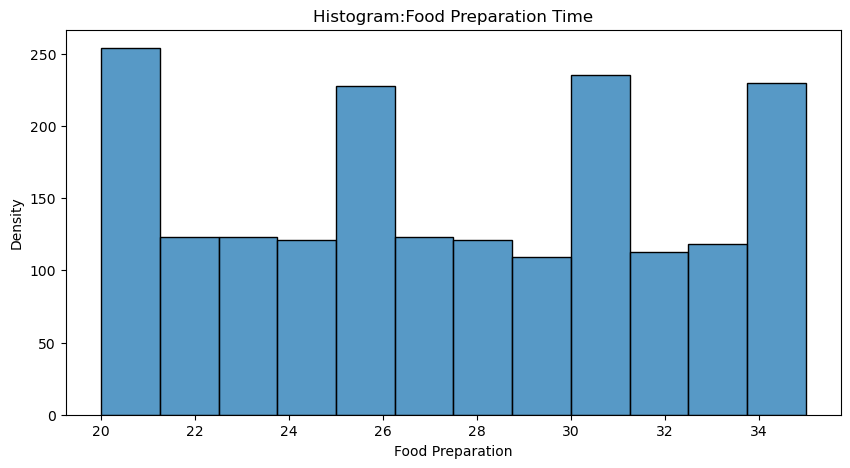

In [38]:
#Analysing the Food preparation time.
plt.figure(figsize=(10,5))
plt.title('Histogram:Food Preparation Time')
plt.xlabel('Food Preparation')
plt.ylabel('Density')
sns.histplot(data=df, x='food_preparation_time');
plt.show()

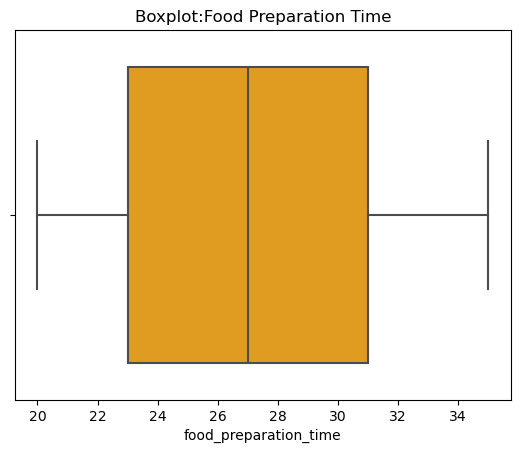

In [39]:
plt.title('Boxplot:Food Preparation Time')
plt.xlabel('Food Preparation')
sns.boxplot(data=df,x='food_preparation_time', color='orange')
plt.show()

**Observations**

*   There are no Outliers in the data
*   The data is very uniform and median is at 27 mins.



C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


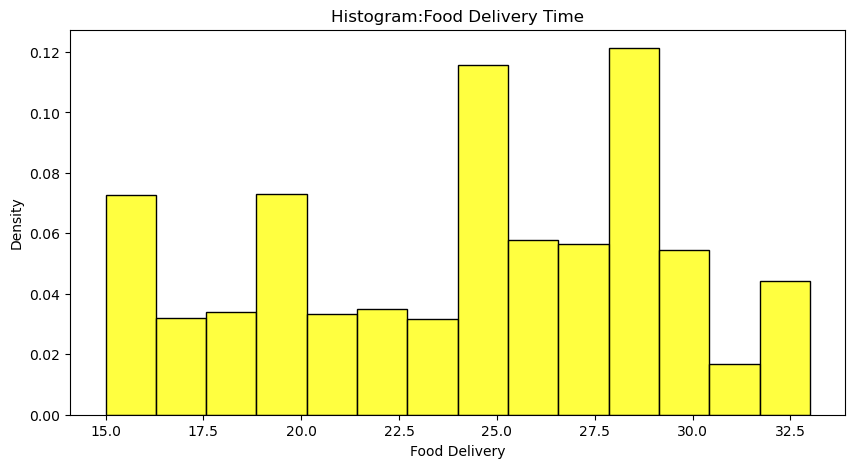

In [41]:
#Analysing the Food delivery time.
plt.figure(figsize=(10,5))
plt.title('Histogram:Food Delivery Time')
plt.xlabel('Food Delivery')
plt.ylabel('Density')
sns.histplot(data=df,x='delivery_time',stat='density', color='yellow');
plt.show()

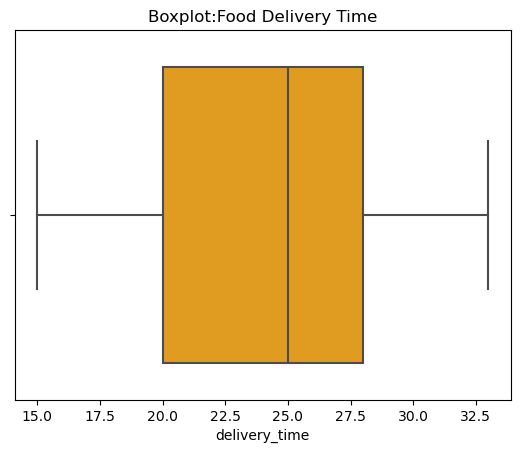

In [42]:
plt.title('Boxplot:Food Delivery Time')
plt.xlabel('Food Delivery')
sns.boxplot(data=df,x='delivery_time', color='orange')
plt.show()

**Observations**

*   The distribution is skewed towards left.
*   There are no outliers present in this column.
*   The median delivery time for the orders is 25 mins, 1st quartile and
    3rd quartile delivery times are 20 and 28 mins respectively





C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


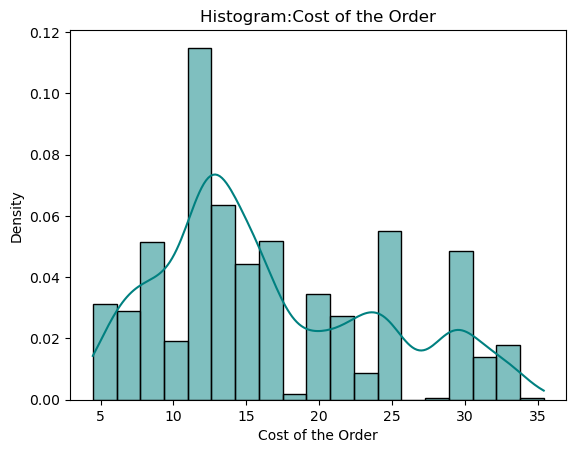

In [44]:
#Plot the distribution for cost of the orders
sns.histplot(data=df,x='cost_of_the_order',stat='density', kde=True, color='teal')
plt.title('Histogram:Cost of the Order')
plt.xlabel('Cost of the Order')
plt.ylabel('Density')
plt.show()

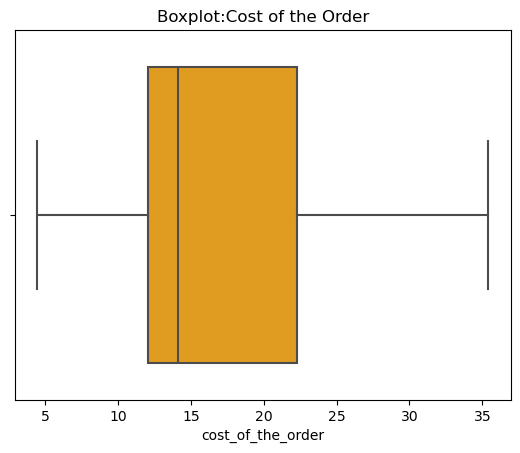

In [45]:
plt.title('Boxplot:Cost of the Order')
plt.xlabel('Cost of the Order')
sns.boxplot(data=df,x='cost_of_the_order', color='orange')
plt.show()

**Observations**

*   There are no outliers for the data
*   The median cost of the order is 14$
*   The distribution is right skewed



Lets explore the distribution for categorical columns like ratings, cuisine type, restuarants etc.

<Axes: xlabel='day_of_the_week', ylabel='count'>

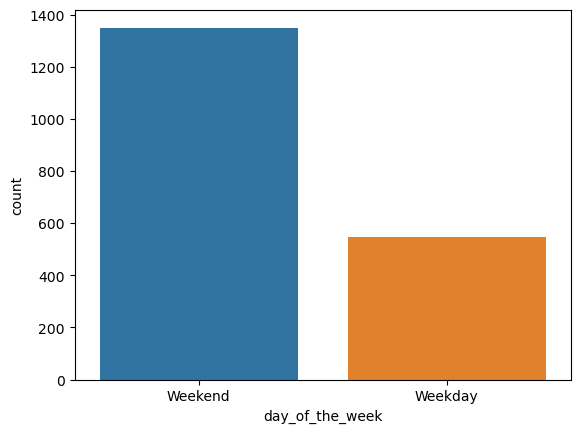

In [48]:
#Distribution for the day of the week
sns.countplot(data = df, x = 'day_of_the_week')

**Observations**


*   It clearly signifies that there are more orders over the weekend than the weekday



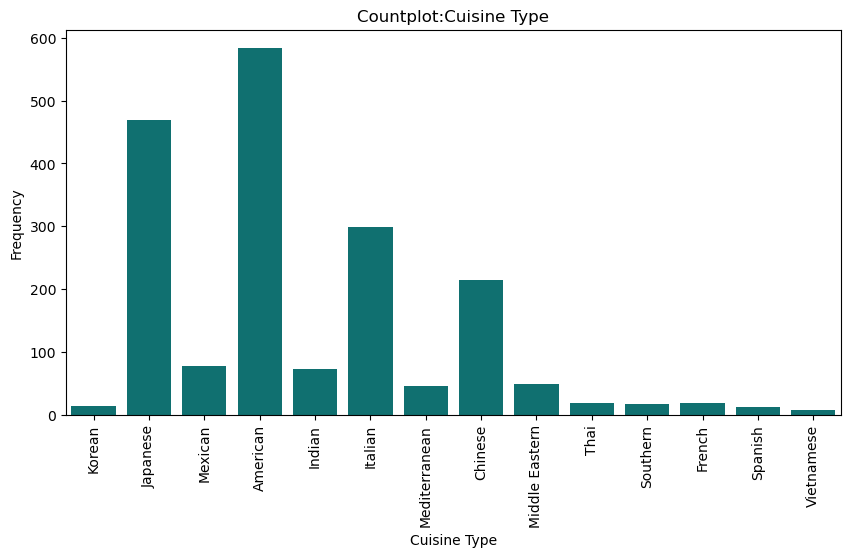

In [50]:
#Plot the distribution for cuisine types.
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='cuisine_type', color='teal')
plt.title('Countplot:Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

**Observations**
The popular cuisine types are American, Japanese, Italian and Chinese respectively.

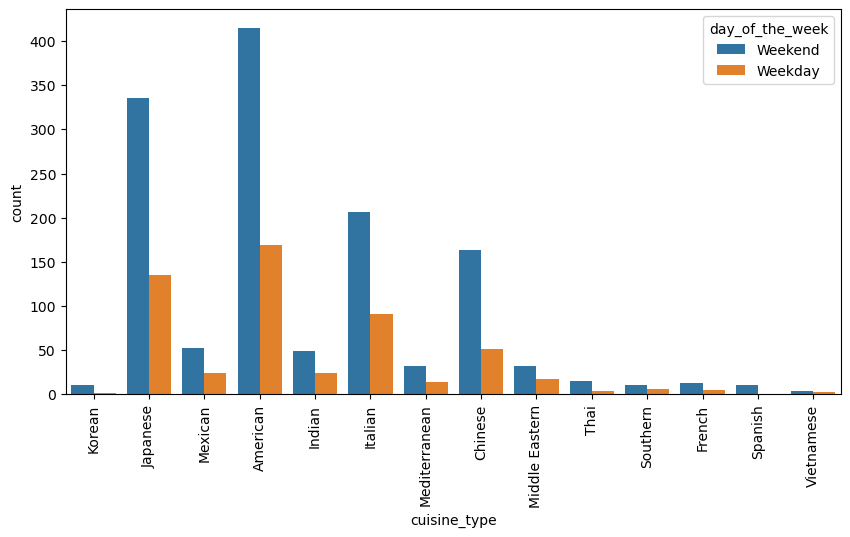

In [52]:
#Generate Bargraph for the cuisine type for days
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='cuisine_type',hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

**Observations**

*   Most of the cuisines have more orders over the weekends.
*   American, Japanese, Italian and Chinese are the most popular cuisines over the weekends as well as weekdays.



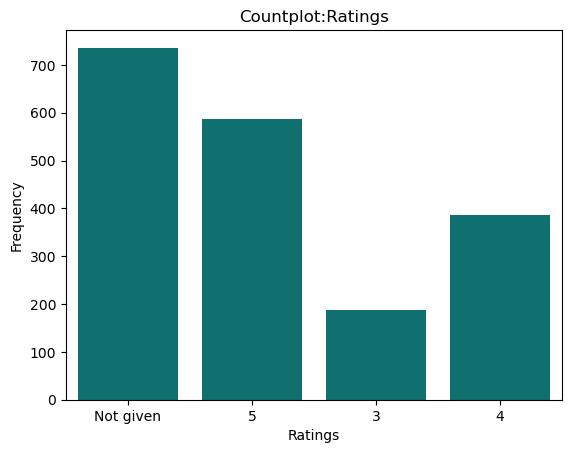

In [54]:
#distribution for count of ratings
sns.countplot(data=df,x='rating', color='teal')
plt.title('Countplot:Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

*  There are more than 700 orders, i.e 736 orders for which are not given any rating.
*  Customers close to 600, have given 5 star rating for the service.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [57]:
# Top 5 restaurants with respect to the number of orders received.
df['restaurant_name'].value_counts().head()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:

These are the popular restaurants, based on the number of orders received.


### **Question 8**: Which is the most popular cuisine on weekends?

In [60]:
#Find the popular cuisine on the weekends

df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts().head()

cuisine_type
American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: count, dtype: int64

#### Observations:

So Far, American cuisine is the leading or most popular cuisine over the weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [63]:
#Find the percentage of orders, costing more than 20 dollars
df_cost = df[df['cost_of_the_order'] > 20]
df_percentage = df_cost['order_id'].count()/df.shape[0]*100

print('There are total', df_cost.shape[0], 'orders, costing more than 20 dollars.')
print('The percentage of orders, costing more than 20 dollars is', round(df_percentage,2), '%')

There are total 555 orders, costing more than 20 dollars.
The percentage of orders, costing more than 20 dollars is 29.24 %


### **Question 10**: What is the mean order delivery time?

In [65]:
# Find the mean order Delivery time
print('The average delivery time for the orders is', round(df['delivery_time'].mean(),2), 'mins.')

The average delivery time for the orders is 24.16 mins.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [67]:
# Find the top 3 most frequent customers.
df['customer_id'].value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

**Observations:**

The following customers are eligble for the discount vouchers

*   The customer with customer_id - 52832 has placed 13 orders
*   The customer with customer_id - 47440 has placed 10 orders
*   The customer with customer_id - 83287 has placed 9 orders




### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

<Figure size 1500x700 with 0 Axes>

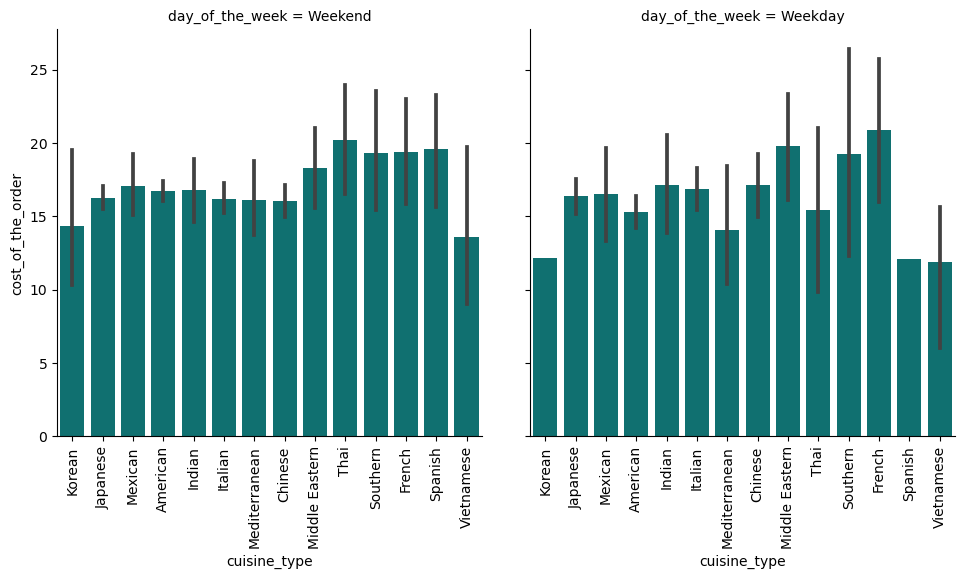

In [71]:
# Find the relationship between Cost of the order and Cuisine type
plt.figure(figsize=(15,7))
my_plot = sns.catplot(data=df,x='cuisine_type',y='cost_of_the_order', col='day_of_the_week', kind='bar', color='teal')
my_plot.set_xticklabels(rotation=90)
plt.show()

**Observations**
*   Most of the cuisines have lesser costs over the weekdays.
*   French cuisines have more cost on the weekdays.




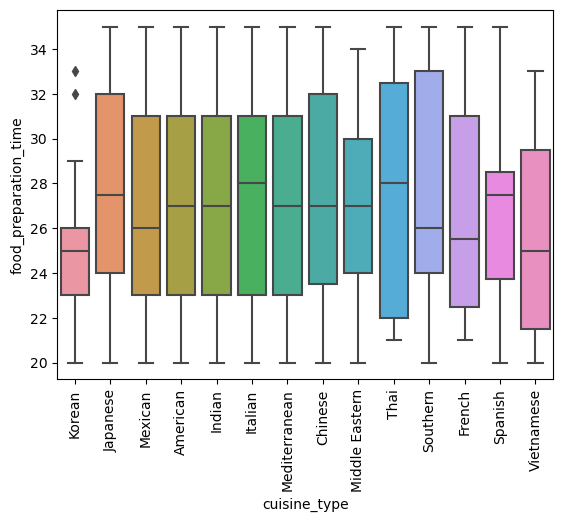

In [73]:
#Cuisine Type vs Preparation time
sns.boxplot(data=df,x='cuisine_type',y='food_preparation_time')
plt.xticks(rotation=90)
plt.show()

**Observations**

*   Korean cuisine have outliers in the maximum range.
*   Italian and Thai cuisines have around 28 mins of median food preparation time.



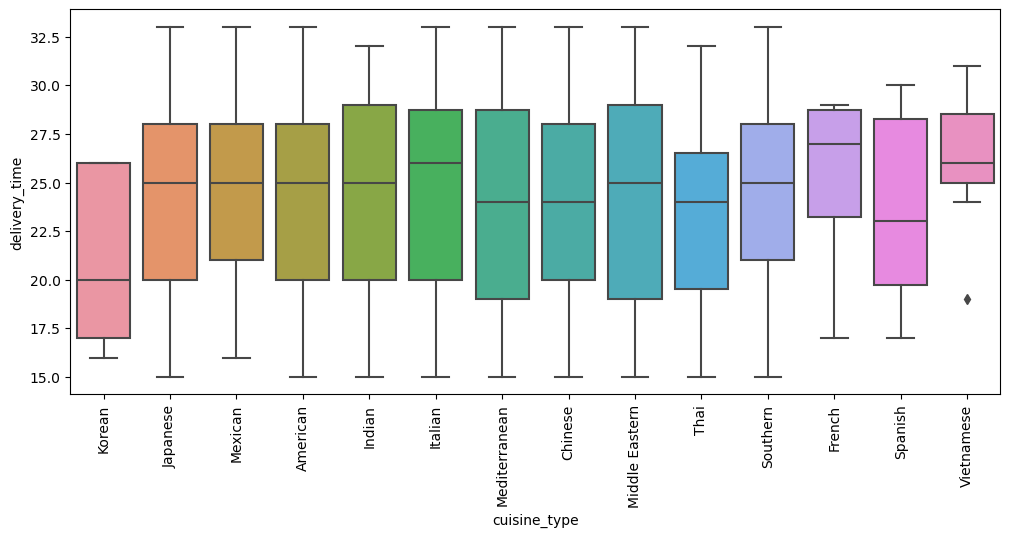

In [75]:
#Cuisine Type vs Delivery time
plt.figure(figsize=(12,5))
sns.boxplot(data=df,x='cuisine_type',y='delivery_time')
plt.xticks(rotation=90)
plt.show()

**Observations**

*   Korean Cuisine takes least median delivery time
*   French Cuisine takes highest median delivery time
*   Japanese, Mexican, American and Indian take approximately same median delivery time i.e 25 mins.



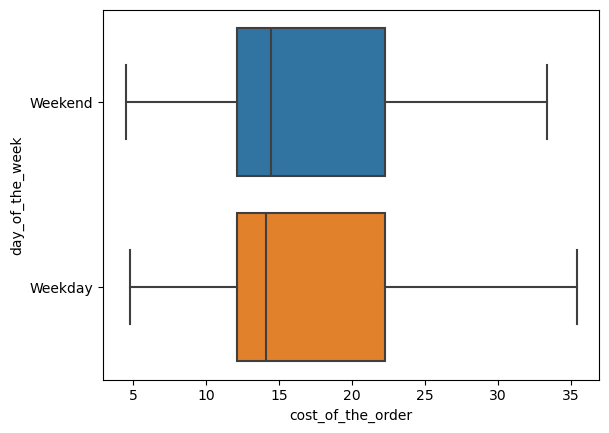

In [77]:
#cost_of_order vs days_of_week
sns.boxplot(data=df,y='day_of_the_week',x='cost_of_the_order')
plt.show()

**Observations**
 We dont have significant data to support the costs for weekend and Weekdays, using this plot.



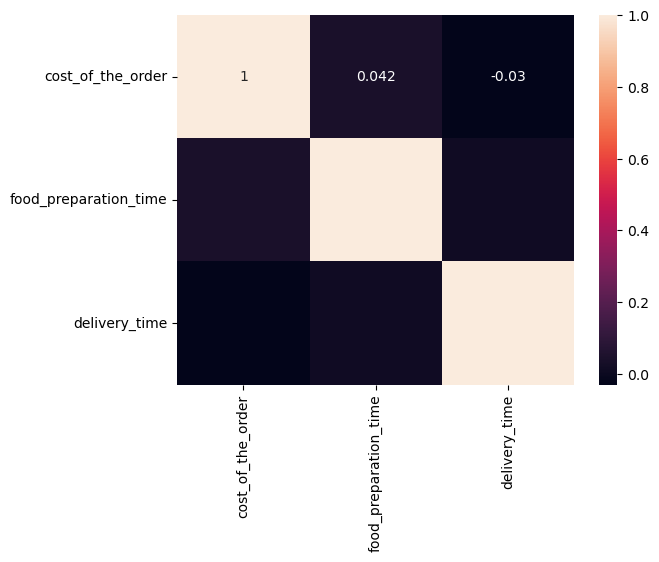

In [79]:
#Lets examine the correlation between cuisine type, cost and days of the week using heat map.
sns.heatmap(df[['cost_of_the_order','food_preparation_time','delivery_time']].corr(), annot=True);
plt.show()

**Observations:**

*   There is little positive correlation between cost of the order and food preparation time
*   there is negative relation between cost of the order and delivery time.



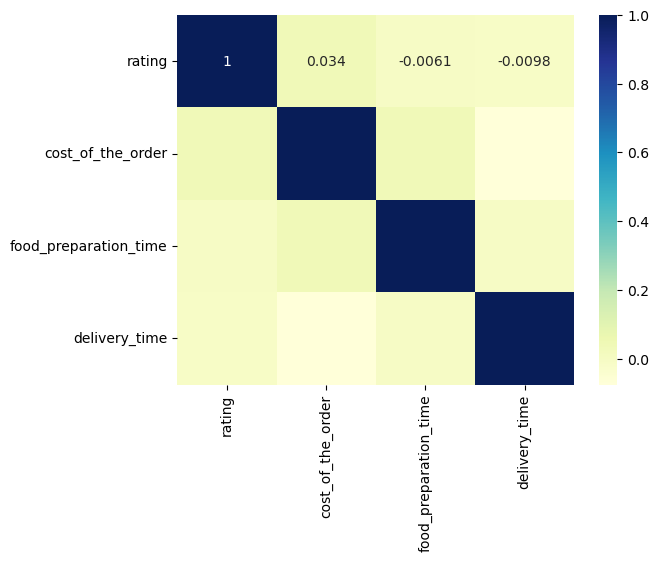

In [81]:
df_rated = df[df['rating'] != 'Not given'].copy()
# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')
#Lets examine the correlation between rating, cuisine type, cost days of the week using heat map.
sns.heatmap(data=df_rated[['rating','cost_of_the_order','food_preparation_time','delivery_time']].corr(), annot=True, cmap='YlGnBu')
plt.show()

# Observations:
There is positive relation between rating and the cost of the order.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [84]:
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()


,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [85]:
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name'] ## Complete the code to get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()
df_mean_4
# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating


,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:

*   Shake Shack restaurant has 133 ratings and average of 4.2
*   The Meatball Shop has 84 ratings and average of 4.5 rating.
*   Blue Ribbon Sushi has 73 ratins and average of 4.2 rating.
*   Blue Ribbon Fried Chicken has 64 ratings and average of 4.3 rating.
*   RedFarm Broadway has 41 ratings.



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [88]:
def revenue_generated(cost):
  if cost > 20:
    return cost*0.25
  elif cost > 5:
    return cost*0.15
  else:
    return cost*0

df['revenue'] = df['cost_of_the_order'].apply(revenue_generated)
print('The total revenue is ', df['revenue'].sum())
df.reset_index(inplace=True)
df.head()

The total revenue is  6166.303


,index,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [89]:
df.head()

,index,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


#### Observations:

The total net revenue generated by the company is  6166.303$

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [92]:
# Find the time taken to prepare and deliver the food
df['food_preparation_time'] = df['food_preparation_time'].astype(int)
df['delivery_time'] = df['delivery_time'].astype(int)
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
orders_above_60 = df[df['total_time'] > 60]
orders_above_60.shape[0]/df.shape[0]*100

10.537407797681771

#### Observations:
10.53% of orders take more than 60 mins to deliver the orders from the time, it is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

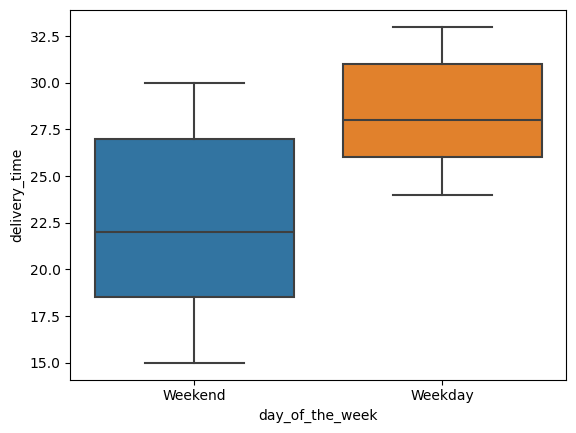

In [95]:
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time')
plt.show()

In [96]:
df['weekday_delivery_time'] = df['delivery_time'][df['day_of_the_week'] == 'Weekday']
df['weekend_delivery_time'] = df['delivery_time'][df['day_of_the_week'] == 'Weekend']
print('The mean delivery time for weekdays is', df['weekday_delivery_time'].mean(), 'mins.')
print('The mean delivery time for weekends is', df['weekend_delivery_time'].mean(), 'mins.')

The mean delivery time for weekdays is 28.340036563071298 mins.
The mean delivery time for weekends is 22.4700222057735 mins.


#### Observations:
The average delivery time over weekdays is more than weekend.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
I made the following conclusions based on the data.

1. There are 5 numerical columns in the data and 4 object type columns in the Dataset with 1898 rows and
2. There are no missing data or null values in the data except for no ratings for some orders.
3. The minimum time, it takes to prepare the food is 20 minutes.
4. The average time, it takes to prepare the food is 27 minutes.
5. The maximum time, it takes to prepare the food is 35 minutes.
6. There is a standard deviation of 5 mins for the food delivery time.
7. There are total of 736 orders, which are not given any rating.
8. 61% of the customers out of 1200 customers haven't given any ratings.
9. There are total of 1898 orders received so far.
10.There are total of  14 cuisine types.
11. The data for the food preparation time is very uniform and median is at 27 mins.
12. The median food delivery time for the orders is 25 mins, 1st quartile and 3rd quartile delivery times are 20 and 28 mins respectively.
13. The median cost of the order is 14 dollars.
14. It clearly signifies that there are more orders over the weekend than the weekday
15. Most of the cuisines have more orders over the weekends.
16. American, Japanese, Italian and Chinese are the most popular cuisines over the weekends as well as weekdays and American cuisine is the most popular of all.
17. The percentage of orders, costing more than 20 dollars is 29.24 %
18. The average delivery time for the orders is 24.16 mins.
19. The customer with customer_id - 52832 has placed maximum of 13 orders.
20. Most of the cuisines have lesser costs over the weekdays.
21. French cuisines have more cost on the weekdays and highest median delivery times.
22. Italian and Thai cuisines have around 28 mins of median food preparation time.
23. Shake Shack restaurant has 133 ratings and an average of 4.2
24. The Meatball Shop has 84 ratings and an average of 4.5 rating.
25. Blue Ribbon Sushi has 73 ratings and an average of 4.2 rating.
26. Blue Ribbon Fried Chicken has 64 ratings and an average of 4.3 rating.
27. RedFarm Broadway has 41 ratings.
28. The total net revenue generated by the company is 6166.303$
29. 10.53% of orders take more than 60 mins to deliver the orders from the time, it is placed.
30. The average delivery time over weekdays is more than weekends.
31. There is a positive relation between rating and the cost of the order.






### Recommendations:

*  There is room for improvement in delivery times for any day. This can be done by increasing the transport facility and no of drivers availability in the most rated and popular cuisines.
*  Many customers have not provided a rating for the service provided and proper investigation is needed on why they haven't provided one the rating definitely impacts the future revenue generation and sales.
*  There are many incentives like extra coupons or discounts if the ratings are given.
* Many incentives like future discounts to be given for any referrals or recommendations provided by the customers.
*  Add promotional offers to be provided for the most reliable customers for additional orders so we can generate more revenue.
*  As most cuisines have lower rates on weekdays, we need to promote it well by sending text messages or email notifications, so the customers are well noticed about it.
*  The coupons should be given with the date range, so customers can avail of that opportunity between those times, to increase sales.


---